In [ ]:
#since you are giving us more time I will try to redo the models

In [69]:

import csv
from bs4 import BeautifulSoup
import urllib2
import pandas as pd
import numpy as np
import time
import csv
import seaborn as sb
import matplotlib.pyplot as plt
import json
%matplotlib inline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

In [3]:
searchListings = pd.read_csv('SearchListings.csv')


In [5]:
searchListings.head(1)


,Unnamed: 0,City Location,Company Name,Description,Job Title,Salary Level,Search Criteria,City,State Zip,blank,State,Zip,high,low,CA,IL,IN,KY,OH,TX
0,2,"Chicago, IL 60606",Purohit Navigation,"Assist with data QC process on an ad hoc basis. We offer thoughtful research design, expertly executed data collection, and actionable research insights to...",Market Research Analyst,low,data scientist,Chicago,IL 60606,NaN,IL,60606,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [7]:
searchListings.shape


(2934, 20)

In [8]:
print np.sum(searchListings['low'])
print np.sum(searchListings['high'])

1756.0
1178.0


In [9]:
highPivot=pd.pivot_table(searchListings, 
                    index = ['State',], 
                        values=['high'], 
                        aggfunc = [np.sum]).head()
lowPivot=pd.pivot_table(searchListings, 
                    index = ['State',], 
                        values=['low'], 
                        aggfunc = [np.sum]).head()
highPivot

,sum
,high
State,
CA,935.0
IL,156.0
IN,1.0
KY,4.0
OH,9.0


In [10]:
#salaryByState=pd.DataFrame(lowPivot).join(pd.DataFrame(highPivot))
#created the table just to get a feel of the data
salaryByState=pd.concat([lowPivot, highPivot],axis=1)
salaryByState.columns=[' '.join(col).strip() for col in salaryByState.columns.values]
salaryByState

,sum low,sum high
State,,
CA,1195.0,935.0
IL,394.0,156.0
IN,1.0,1.0
KY,11.0,4.0
OH,14.0,9.0


In [21]:
# I removed the midwest states.
#note I couldn't even include Dayton since they have NO true data science jobs so sad and yet
# a lot of colleges are adding data science programs
def examine_coefficients(model, df):
    df = pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]
X=searchListings[['IL','CA']]
y=searchListings['low']
model = LogisticRegression() 

model.fit(X, y) # This fits the model to learn the coefficients
examine_coefficients(model, X)

,Coefficient,Feature
1,-0.392944,CA
0,0.284899,IL


#Logistic with all states

In [22]:
#so California has more high paying jobs, Chicago has less
def examine_coefficients(model, df):
    df = pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]
X=searchListings[['IL','CA']]
y=searchListings['high']
model = LogisticRegression() 

model.fit(X, y) # This fits the model to learn the coefficients
examine_coefficients(model, X)

,Coefficient,Feature
0,-0.284899,IL
1,0.392944,CA


In [23]:
print model.score(X,y)

0.598500340832


# Grid Search for States

In [24]:
paramerters={
    'penalty':['l1','l2'],
    'C':[0.1,1,10,23.5,50]}

modelAmTesting=LogisticRegression()
grid_search = GridSearchCV(estimator=modelAmTesting, param_grid=paramerters,verbose=10)
grid_search.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.598570 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.598160 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.598772 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.598570 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.598160 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.598772 -   0.0s
[CV] penalty=l1, C=1 .................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    0.1s


[CV] ....................... penalty=l2, C=10, score=0.598570 -   0.0s
[CV] penalty=l2, C=10 ................................................
[CV] ....................... penalty=l2, C=10, score=0.598160 -   0.0s
[CV] penalty=l2, C=10 ................................................
[CV] ....................... penalty=l2, C=10, score=0.598772 -   0.0s
[CV] penalty=l1, C=23.5 ..............................................
[CV] ..................... penalty=l1, C=23.5, score=0.598570 -   0.1s
[CV] penalty=l1, C=23.5 ..............................................
[CV] ..................... penalty=l1, C=23.5, score=0.598160 -   0.0s
[CV] penalty=l1, C=23.5 ..............................................
[CV] ..................... penalty=l1, C=23.5, score=0.598772 -   0.0s
[CV] penalty=l2, C=23.5 ..............................................
[CV] ..................... penalty=l2, C=23.5, score=0.598570 -   0.0s
[CV] penalty=l2, C=23.5 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:    0.4s


[CV] ....................... penalty=l1, C=50, score=0.598570 -   0.2s
[CV] penalty=l1, C=50 ................................................
[CV] ....................... penalty=l1, C=50, score=0.598160 -   0.0s
[CV] penalty=l1, C=50 ................................................
[CV] ....................... penalty=l1, C=50, score=0.598772 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.598570 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.598160 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.598772 -   0.0s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 23.5, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [25]:
print grid_search.best_score_
#accuracy percent that the data set we fed into that it predicted correctly

0.598500340832


In [26]:
predictions=grid_search.best_estimator_.predict(X)
confusion_matrix(y, predictions)

array([[1756,    0],
       [1178,    0]])

In [27]:
print classification_report(y, predictions)

             precision    recall  f1-score   support

        0.0       0.60      1.00      0.75      1756
        1.0       0.00      0.00      0.00      1178

avg / total       0.36      0.60      0.45      2934



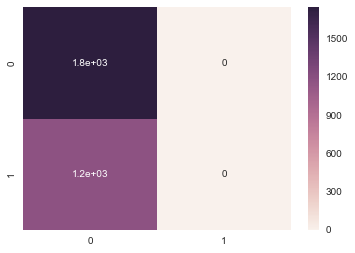

In [28]:
sb.heatmap(confusion_matrix(y,predictions),annot=True)

# I am not going to pursue the states. I am moving on to words
I am going to look a words in job title

In [37]:
#Creating dummies from job title. If I had time I would also do the job summary and 
#compare the two
v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=30, # Only use the top 50 most common words
)
#This builds a matrix with a row per website (or data point) and column per word (using all words in the dataset)
wordsJobTitle = v.fit_transform(searchListings['Job Title']).todense()     #no difference between data.title and data['title]
wordsJobTitle = pd.DataFrame(wordsJobTitle, columns=v.get_feature_names())


In [38]:
print wordsJobTitle.sum().sort_values(ascending=False)


scientist         1055
data              1015
engineer           647
senior             603
manager            349
software           310
analyst            233
research           231
sr                 217
learning           200
machine            197
product            157
director           146
analytics          136
science            114
lead               108
associate           96
developer           86
development         85
statistical         81
engineering         77
principal           76
quantitative        67
staff               64
clinical            50
business            50
big                 47
platform            46
bioinformatics      46
architect           46
dtype: int64


In [39]:
# joining the master file with the words in job title
#I am doing this just in case I want to do words in the description
listingsJobTitle=pd.DataFrame(searchListings).join(pd.DataFrame(wordsJobTitle))

In [40]:
listingsJobTitle.head(1)

,Unnamed: 0,City Location,Company Name,Description,Job Title,Salary Level,Search Criteria,City,State Zip,blank,State,Zip,high,low,CA,IL,IN,KY,OH,TX,analyst,analytics,architect,associate,big,bioinformatics,business,clinical,data,developer,development,director,engineer,engineering,lead,learning,machine,manager,platform,principal,product,quantitative,research,science,scientist,senior,software,sr,staff,statistical
0,2,"Chicago, IL 60606",Purohit Navigation,"Assist with data QC process on an ad hoc basis. We offer thoughtful research design, expertly executed data collection, and actionable research insights to...",Market Research Analyst,low,data scientist,Chicago,IL 60606,NaN,IL,60606,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
wordsJobTitle.columns

Index([u'analyst', u'analytics', u'architect', u'associate', u'big',
       u'bioinformatics', u'business', u'clinical', u'data', u'developer',
       u'development', u'director', u'engineer', u'engineering', u'lead',
       u'learning', u'machine', u'manager', u'platform', u'principal',
       u'product', u'quantitative', u'research', u'science', u'scientist',
       u'senior', u'software', u'sr', u'staff', u'statistical'],
      dtype='object')

In [90]:
#from my experience with companies in the Dayton region (I visit over 100 companies a year)
#that 'lead','senior','director' are higher paid
def examine_coefficients(model, df):
    df = pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]
y=listingsJobTitle['high']
X=wordsJobTitle[['lead','senior','director']]

In [91]:
model = LogisticRegression() 

model.fit(X, y) # This fits the model to learn the coefficients
examine_coefficients(model, X)
#wow now we are talking numbers lets do a grid search

,Coefficient,Feature
1,0.326278,senior
0,0.451096,lead
2,0.815006,director


In [92]:
#looking at Ridge and Lasso
paramerters={
    'penalty':['l1','l2'],
    'C':[0.1,1,10,23.5,50]}

modelAmTesting=LogisticRegression()
grid_search = GridSearchCV(estimator=modelAmTesting, param_grid=paramerters, verbose=10)
grid_search
grid_search.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.593463 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.600204 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.598772 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.593463 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.605317 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.607984 -   0.0s
[CV] penalty=l1, C=1 .................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:    0.2s


[CV] ....................... penalty=l1, C=50, score=0.622313 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.593463 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.602249 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.622313 -   0.0s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 23.5, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [95]:
print grid_search.best_score_

0.607021131561


In [96]:
predictions=grid_search.best_estimator_.predict(X)

In [102]:
confusion_matrix(y, predictions)
conmat = np.array(confusion_matrix(y, predictions))
confusion=pd.DataFrame(conmat, index=['Listing is High','Listing is Low'],
                      columns=['predicted_high','predicted_low'])
confusion 

,predicted_high,predicted_low
Listing is High,1692,64
Listing is Low,1089,89


In [97]:
print classification_report(y, predictions)

             precision    recall  f1-score   support

        0.0       0.61      0.96      0.75      1756
        1.0       0.58      0.08      0.13      1178

avg / total       0.60      0.61      0.50      2934



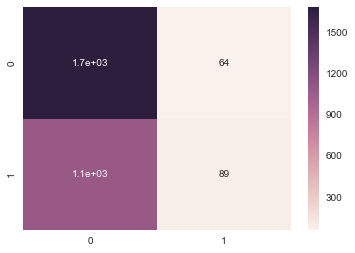

In [98]:
sb.heatmap(confusion_matrix(y,predictions),annot=True)

In [45]:
#lets go for it and look at all variables
X=wordsJobTitle[[
'analyst', u'analytics', 'architect', 'associate', 'big',
       'bioinformatics', 'business', 'clinical', 'data', 'developer',
       'development', 'director', 'engineer', 'engineering', 'lead',
       'learning', 'machine', 'manager', 'platform', 'principal',
       'product', 'quantitative', 'research', 'science', 'scientist',
       'senior', 'software', 'sr', 'staff', 'statistical']]


In [49]:
print X.shape
print y.shape

(2934, 30)
(2934,)


In [54]:
def examine_coefficients(model, df):
    df = pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]
y=listingsJobTitle['high']
X=wordsJobTitle[['analyst', 'analytics', 'architect', 'associate', 'big',
       'bioinformatics', 'business', 'clinical', 'data', 'developer',
       'development', 'director', 'engineer', 'engineering', 'lead',
       'learning', 'machine', 'manager', 'platform', 'principal',
       'product', 'quantitative', 'research', 'science', 'scientist',
       'senior', 'software', 'sr', 'staff', 'statistical']]

In [51]:
model = LogisticRegression() 

model.fit(X, y) # This fits the model to learn the coefficients
examine_coefficients(model, X)

,Coefficient,Feature
3,-0.739300,associate
22,-0.715667,research
0,-0.556808,analyst
29,-0.446095,statistical
23,-0.003071,science
15,0.043920,learning
1,0.049465,analytics
26,0.083912,software
13,0.089672,engineering
10,0.142905,development


In [55]:
print model.score(X,y)

0.61997273347


In [ ]:
#now I am going to run the model with director, engineer, architect, quantitative 

In [56]:
def examine_coefficients(model, df):
    df = pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]
y=listingsJobTitle['high']
X=wordsJobTitle[['architect','director', 'engineer', 'quantitative']]
model = LogisticRegression() 

model.fit(X, y) # This fits the model to learn the coefficients
examine_coefficients(model, X)

,Coefficient,Feature
3,0.015402,quantitative
2,0.623549,engineer
0,0.631727,architect
1,0.933229,director


In [57]:
#not good enough
print model.score(X,y)

0.611111111111


In [62]:
def examine_coefficients(model, df):
    df = pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]
y=listingsJobTitle['high']
X=wordsJobTitle[[ 'architect','bioinformatics', 'developer',
       'learning', 'machine', 'principal', 'quantitative', 'research',
       'senior',  'statistical']]
model = LogisticRegression() 

model.fit(X, y) # This fits the model to learn the coefficients
examine_coefficients(model, X)

,Coefficient,Feature
7,-1.159709,research
9,-0.816565,statistical
2,-0.102118,developer
6,-0.048435,quantitative
3,-0.044076,learning
1,-0.030748,bioinformatics
8,0.293044,senior
4,0.350377,machine
0,0.375983,architect
5,0.455820,principal


In [63]:
#not good enough
print model.score(X,y)

0.598841172461


In [ ]:
#Test Train 
#I settled on lead senior and director.  Less words is sometimes more

In [64]:
X=wordsJobTitle[['lead','senior','director']]

In [82]:
X_train, X_test, y_train, y_test=train_test_split(wordsJobTitle,y, test_size= 0.4)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(1760, 30) (1760,)
(1174, 30) (1174,)


In [83]:
lm = LogisticRegression()

In [84]:
lm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
model = lm.fit(X_train, y_train)

Score 0.595400340716


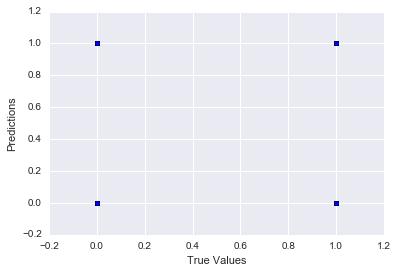

In [86]:
predictions=lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print "Score",model.score(X_test, y_test)
#The scatter plot was not very informative
#the test score was close to .62

In [87]:
X_train, X_test, y_train, y_test=train_test_split(wordsJobTitle,y, test_size= 0.3)
model = lm.fit(X_train, y_train)
predictions=lm.predict(X_test)
print "Score",model.score(X_test, y_test)
#I like this one

Score 0.627695800227


In [88]:
X_train, X_test, y_train, y_test=train_test_split(wordsJobTitle,y, test_size= 0.5)
model = lm.fit(X_train, y_train)
predictions=lm.predict(X_test)
print "Score",model.score(X_test, y_test)
#I like this one

Score 0.595773687798


The following cities were included in the study, Chicago, Cincinnati, Louisville, San Francisco, and Austin.

The cost of living index. Chicago = 111 Cincinnati = 83 Louisville = 91 Austin Tx = 78.26, and San Francisco = 189.

Median pay for a Data Scientist 93,146. The ranger is  64,953−126,183 Chicago the median is 83,437. The range is 53,469−114.196 
Austin the median 83,084.The range is 49,460−108,409 
SanFrancisco the median salary is 112,468 and the range is 82,601-137,236
This data is from www.payscale.com

I scraped the data from indeed.com.  I decided that high salary would be $100,000 and above regardless of cost of living for each city since the recruiting firm can work remotely in any city.  

Originally I thought the cities (especially San Francisco) would predict high salary and I was wrong. When I looked at indeed.com. I was surprised to see how many entry level jobs there were in San Francisco. After looking at the coefficients and confusion model, it was recommended I try eliminating the smaller markets: Cincinnati, Louisville, and Austin.  Note I did my analysis on the states. I did not want to analyze the cities since workers can compute in from the suburbs.  

I reran the model with just San Francisco and Chicago. 
Chicago's coefficient was -.28 and San Francisco was .39 with an accuracy of .598. If the recruiting firm did want to focus on a city they should focus on San Francisco.  If a company is looking to relocate then they should look at Chicago.  	

After examining the cities, I decided to change direction and look at words in title.  I know a little something about titles since I visit over a 100 companies a year.  I  ran a Count Vectorization and listed the top 30 words.  I ran the model with all the words and accuracy was .62. I played around and tried running with different sets of words and settled on 3: senior, lead, and director. These words imply responsibility and experience.

The coefficients were Senior = .33 Lead = .45 Director = .82
The accuracy was also .62

The confusion matrix results were True Positive: tested high and was high 1,700 False Positive: Tested high and was low 64 False Negative: Tested low and was high 1,100 True Negative: Test negative and was negative 89
The precision was .6 - when the model predicted high it was right 60% of the time.
